In [1]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fsh
import pandas as pd

/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# 加利福尼亚房屋价值

In [3]:
housevalue = fsh()

In [4]:
X = pd.DataFrame(housevalue.data)

In [6]:
X.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
y = housevalue.target

In [8]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [9]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [10]:
X.columns = housevalue.feature_names

In [15]:
housevalue.data.shape

(20640, 8)

In [11]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=420)

In [13]:
# 分集合有随机，这里恢复索引

for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])

In [14]:
X.shape

(20640, 8)

In [16]:
Xtrain.shape

(14448, 8)

In [17]:
# 建模

reg = LR().fit(Xtrain, Ytrain)

In [18]:
yhat = reg.predict(Xtest)

In [19]:
yhat

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

In [20]:
# 训好的模型的属性

reg.coef_

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [21]:
[*zip(Xtrain.columns, reg.coef_)]

[('MedInc', 0.4373589305968406),
 ('HouseAge', 0.010211268294493916),
 ('AveRooms', -0.1078072161731777),
 ('AveBedrms', 0.6264338275363787),
 ('Population', 5.216125353122233e-07),
 ('AveOccup', -0.003348509646333547),
 ('Latitude', -0.41309593789477145),
 ('Longitude', -0.4262109536208467)]

# 线性回归的评估

In [23]:
# 模型评估

from sklearn.metrics import mean_squared_error as MSE

In [24]:
MSE(yhat, Ytest)

0.5309012639324571

In [25]:
y.max()

5.00001

In [26]:
y.min()

0.14999

In [30]:
# 在决策树和随机森林中都提到过,虽然均方误差永远为正,但是sklearn中的参数scoring下,均方误差作为评判
# 标准时,却是计算”负均方误差“(neg_mean_squared_error)。
cross_val_score(reg, X, y, cv=10, scoring="neg_mean_squared_error")

array([-0.48922052, -0.43335865, -0.8864377 , -0.39091641, -0.7479731 ,
       -0.52980278, -0.28798456, -0.77326441, -0.64305557, -0.3275106 ])

In [31]:
from sklearn.metrics import r2_score

In [32]:
r2_score(Ytest, yhat)

0.6043668160178817

In [33]:
cross_val_score(reg, X, y, cv=10, scoring="r2").mean()

0.5110068610524541

In [34]:
reg.score(Xtest, Ytest)

0.6043668160178817

In [35]:
r2_score(Ytest, yhat)

0.6043668160178817

In [36]:
%matplotlib inline

In [38]:
import numpy as np
import matplotlib.pyplot as plt

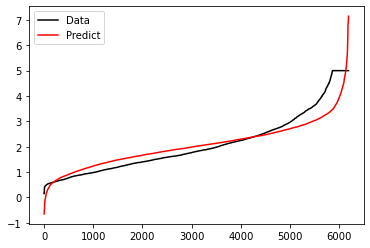

In [42]:
plt.plot(range(len(Ytest)), sorted(Ytest), c="black", label="Data")
plt.plot(range(len(yhat)), sorted(yhat), c="red", label="Predict")
plt.legend()
plt.show()

In [43]:
rng = np.random.RandomState(42)
X = rng.randn(100, 80)
y = rng.randn(100)
cross_val_score(LR(), X, y, cv=5, scoring="r2")

array([-178.77729125,   -5.71277525,  -15.16746093,  -77.01587303,
        -66.04337804])

# 处理多重共线性 

- 岭回归
- LASSO

In [44]:
from sklearn.linear_model import Ridge, Lasso

In [50]:
X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = housevalue.feature_names
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=420)
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])

In [51]:
reg_ridge = Ridge(alpha=1).fit(Xtrain, Ytrain)

In [52]:
# 与线性回归一样
reg_ridge.score(Xtest, Ytest)

0.6043610352312279

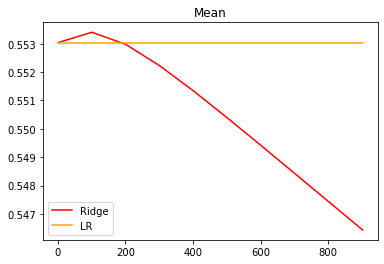

In [53]:
# 交叉验证，与线性回归相比，岭回归的结果如何变化

alpharange = np.arange(1, 1001, 100)
ridge, lr = [], []

for alpha in alpharange:
    reg_ridge = Ridge(alpha=alpha)
    reg_linear = LR()
    reg_ridge_score = cross_val_score(reg_ridge, X, y, cv=5, scoring="r2").mean()
    reg_linear_score = cross_val_score(reg_linear, X, y, cv=5, scoring="r2").mean()
    ridge.append(reg_ridge_score)
    lr.append(reg_linear_score)

plt.plot(alpharange, ridge, color="red", label="Ridge")
plt.plot(alpharange, lr, color="orange", label="LR")
plt.title("Mean")
plt.legend()
plt.show()
    

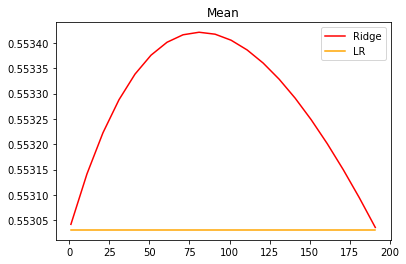

In [54]:
# 细粒度

alpharange = np.arange(1,201,10)

ridge, lr = [], []

for alpha in alpharange:
    reg_ridge = Ridge(alpha=alpha)
    reg_linear = LR()
    reg_ridge_score = cross_val_score(reg_ridge, X, y, cv=5, scoring="r2").mean()
    reg_linear_score = cross_val_score(reg_linear, X, y, cv=5, scoring="r2").mean()
    ridge.append(reg_ridge_score)
    lr.append(reg_linear_score)

plt.plot(alpharange, ridge, color="red", label="Ridge")
plt.plot(alpharange, lr, color="orange", label="LR")
plt.title("Mean")
plt.legend()
plt.show()
    

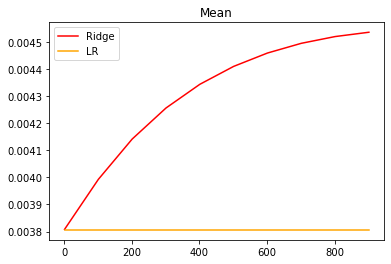

In [55]:
# 模型方差如何变化

alpharange = np.arange(1, 1001, 100)
ridge, lr = [], []

for alpha in alpharange:
    reg_ridge = Ridge(alpha=alpha)
    reg_linear = LR()
    reg_ridge_score = cross_val_score(reg_ridge, X, y, cv=5, scoring="r2").var()
    reg_linear_score = cross_val_score(reg_linear, X, y, cv=5, scoring="r2").var()
    ridge.append(reg_ridge_score)
    lr.append(reg_linear_score)

plt.plot(alpharange, ridge, color="red", label="Ridge")
plt.plot(alpharange, lr, color="orange", label="LR")
plt.title("Mean")
plt.legend()
plt.show()
    

In [56]:
# 选最佳 alpha
from sklearn.linear_model import RidgeCV

In [57]:
Ridge_ = RidgeCV(alphas=np.arange(1, 1001, 100)
                 ,store_cv_values=True
                ).fit(X, y)

In [58]:
Ridge_.score(X, y)

0.606025176733842

In [59]:
Ridge_.cv_values_.shape

(20640, 10)

In [60]:
Ridge_.cv_values_.mean(axis=0)

array([0.52823795, 0.52787439, 0.52807763, 0.52855759, 0.52917958,
       0.52987689, 0.53061486, 0.53137481, 0.53214638, 0.53292369])

In [61]:
Ridge_.alpha_

101

# LASSO 做特征选择

In [63]:
# LASSO 做特征选择

from sklearn.linear_model import Lasso

In [65]:
reg = LR().fit(Xtrain, Ytrain)
(reg.coef_ * 100).tolist()

[43.73589305968406,
 1.0211268294493916,
 -10.78072161731777,
 62.643382753637866,
 5.2161253531222327e-05,
 -0.3348509646333547,
 -41.30959378947715,
 -42.621095362084674]

In [67]:
ridge_ = Ridge(alpha=0).fit(Xtrain, Ytrain)
(ridge_.coef_ * 100).tolist()

[43.73589305968402,
 1.0211268294494151,
 -10.780721617317601,
 62.6433827536373,
 5.2161253532713064e-05,
 -0.3348509646333586,
 -41.30959378947672,
 -42.62109536208429]

In [70]:
lasso_ = Lasso(alpha=0.01).fit(Xtrain, Ytrain)
(lasso_.coef_ * 100).tolist()

[40.10568371834485,
 1.0936292607860136,
 -3.742376361024449,
 26.52403783489718,
 0.0003525368511503939,
 -0.32071293948877994,
 -40.064830473448424,
 -40.81754399163315]

In [71]:
# 0.1 已经有特征被压成 0 了
lasso_ = Lasso(alpha=0.1).fit(Xtrain, Ytrain)
(lasso_.coef_ * 100).tolist()

[39.08851438329683,
 1.6054695654279874,
 -0.0,
 0.0,
 0.0023777014839091366,
 -0.30501868956381145,
 -10.771509301655527,
 -9.294344477958063]

In [72]:
# 选 Lasso 的参数

from sklearn.linear_model import LassoCV

In [74]:
# #10**(-10)到10**(-2)次方
alpharange = np.logspace(-10, -1, 200, base=10)

In [75]:
lasso_ = LassoCV(alphas=alpharange
                 ,cv=5
                ).fit(Xtrain, Ytrain)

In [76]:
# 选出的最佳正则化参数
lasso_.alpha_

0.002121451784910632

In [77]:
lasso_.mse_path_

array([[0.59642645, 0.56419151, 0.63214523, 0.58856037, 0.63412587],
       [0.58470318, 0.55247005, 0.61970801, 0.57524954, 0.6208534 ],
       [0.57514326, 0.54310648, 0.60964517, 0.56437627, 0.61000259],
       [0.5673352 , 0.53563454, 0.60150283, 0.5554869 , 0.60111406],
       [0.56096864, 0.52969972, 0.59491704, 0.54821437, 0.59384536],
       [0.55576884, 0.52499368, 0.58959261, 0.5422518 , 0.58788886],
       [0.55151937, 0.52127415, 0.5852829 , 0.53737318, 0.58300315],
       [0.54804422, 0.51834557, 0.58180849, 0.53337205, 0.57898444],
       [0.54519532, 0.51604623, 0.57900433, 0.53008729, 0.57568767],
       [0.54284822, 0.51425716, 0.57673455, 0.52738776, 0.57297492],
       [0.54092589, 0.51277455, 0.57492738, 0.52516137, 0.57073985],
       [0.53936276, 0.51161018, 0.57349219, 0.52322008, 0.56889069],
       [0.53808919, 0.51072185, 0.57235268, 0.52150044, 0.56736727],
       [0.53705081, 0.5100503 , 0.57145684, 0.51986239, 0.56610671],
       [0.53458681, 0.50808143, 0.

In [78]:
# 有注意到在岭回归中我们的轴向是axis=0吗? 
# 因为岭回归是留一交叉验证

lasso_.mse_path_.mean(axis=1) 

array([0.60308989, 0.59059684, 0.58045476, 0.5722147 , 0.56552903,
       0.56009916, 0.55569055, 0.55211096, 0.54920417, 0.54684052,
       0.54490581, 0.54331518, 0.54200629, 0.54090541, 0.53888749,
       0.53740296, 0.53610164, 0.53508097, 0.5340925 , 0.53246937,
       0.53074132, 0.52936918, 0.52828177, 0.52742296, 0.52674736,
       0.52621841, 0.52580656, 0.52548804, 0.52524379, 0.52505835,
       0.52491943, 0.52481711, 0.52474348, 0.52469223, 0.52465829,
       0.52463764, 0.52462712, 0.52462418, 0.52462686, 0.5246336 ,
       0.52464318, 0.52465466, 0.52466733, 0.52468061, 0.52469412,
       0.52470751, 0.5247206 , 0.5247332 , 0.52474522, 0.52475659,
       0.52476727, 0.52477726, 0.52478654, 0.52479514, 0.52480308,
       0.52481039, 0.5248171 , 0.52482325, 0.52482888, 0.52483401,
       0.5248387 , 0.52484296, 0.52484684, 0.52485036, 0.52485356,
       0.52485646, 0.52485909, 0.52486147, 0.52486363, 0.52486558,
       0.52486735, 0.52486894, 0.52487039, 0.52487169, 0.52487

In [79]:
lasso_.coef_

array([ 4.29690851e-01,  1.03658802e-02, -9.29228997e-02,  5.50000786e-01,
        1.16187471e-06, -3.31872927e-03, -4.10391344e-01, -4.22323313e-01])

In [80]:
lasso_.score(Xtest, Ytest)

0.6038837401244812

# 线性模型在非线性数据上的表现

In [82]:
from sklearn.tree import DecisionTreeRegressor

rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=100)

In [83]:
y = np.sin(X) + rnd.normal(size=len(X)) / 3

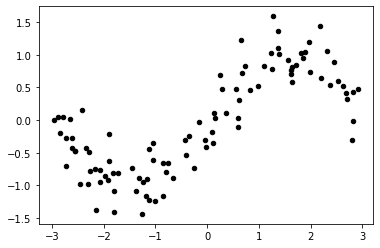

In [84]:
plt.scatter(X, y, marker="o", c="k", s=20)
plt.show()

In [87]:
print(X.shape)
print(y.shape)
print(type(LR()))

(100,)
(100,)
<class 'sklearn.linear_model._base.LinearRegression'>


In [102]:
# 输入 fit 的需要是二维

X = X.reshape(-1, 1)

LinearR = LR().fit(X, y)
TreeR = DecisionTreeRegressor(random_state=0).fit(X, y)

Text(0.5, 0, 'input feature')

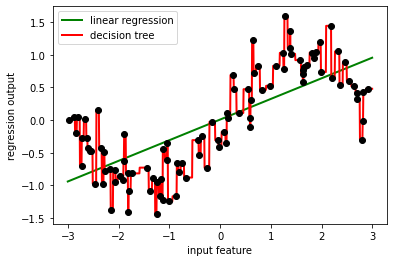

In [103]:
# 放置画布，需要和画图在一个 cell 里
fig, ax1 = plt.subplots(1)

# 创建测试数据: 一系列分布在横坐标上的点

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

# 将测试数据代入 predict 接口，获得模型的拟合效果进行绘制
ax1.plot(line, LinearR.predict(line)
         ,linewidth=2
         ,color="green"
         ,label="linear regression"
        )
ax1.plot(line, TreeR.predict(line)
         ,linewidth=2
         ,color="red"
         ,label="decision tree"
        )

# 将元数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, "o", c="k")

ax1.legend(loc="best")
ax1.set_ylabel("regression output")
ax1.set_xlabel("input feature")


# 分箱处理非线性数据

In [95]:
from sklearn.preprocessing import KBinsDiscretizer

In [96]:
enc = KBinsDiscretizer(n_bins=10
                       ,encode="onehot"
                      )
X_binned = enc.fit_transform(X)

In [97]:
X.shape

(100, 1)

In [98]:
X_binned

<100x10 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [99]:
# 用 pandas 打开稀疏矩阵

import pandas as pd
pd.DataFrame(X_binned.toarray()).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
LinearR_ = LR().fit(X_binned, y)

In [105]:
# 测试集 line 也要相同地分箱

line_binned = enc.transform(line)

array([-0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22510103,
       -0.22510103, -0.22510103, -0.22510103, -0.22510103, -0.22

In [106]:
LinearR_.predict(line_binned).shape

(1000,)

In [110]:
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)

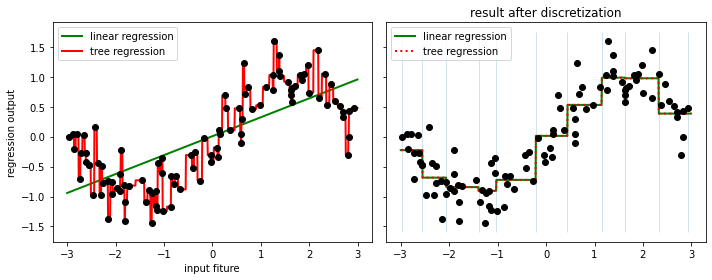

In [113]:
# 绘图

fig, (ax1, ax2) = plt.subplots(ncols=2
                               ,sharey=True # 两种图共享 y 轴刻度
                               ,figsize=(10, 4)
                              )

ax1.plot(line, LinearR.predict(line)
         ,linewidth=2
         ,color="green"
         ,label="linear regression"
        )
ax1.plot(line, TreeR.predict(line)
         ,linewidth=2
         ,color="red"
         ,label="tree regression"
        )
ax1.plot(X[:, 0], y, "o", c="k")
ax1.legend(loc="best")
ax1.set_xlabel("input fiture")
ax1.set_ylabel("regression output")

ax2.plot(line
         ,LinearR_.predict(line_binned)
         ,linewidth=2
         ,color="green"
         ,linestyle="-"
         ,label="linear regression"
        )
ax2.plot(line
         ,TreeR_.predict(line_binned)
         ,linewidth=2
         ,color="red"
         ,linestyle=":"
         ,label="tree regression"
        )

# 绘制和箱宽一致的竖线
ax2.vlines(enc.bin_edges_[0]
            ,*plt.gca().get_ylim() # y 的上限和下限
            ,linewidth=1
            ,alpha=0.2
           )

ax2.plot(X[:, 0], y, "o", c="k")

ax2.legend(loc="best")
ax2.set_title("result after discretization")
plt.tight_layout()
plt.show()

0.8649069759304868


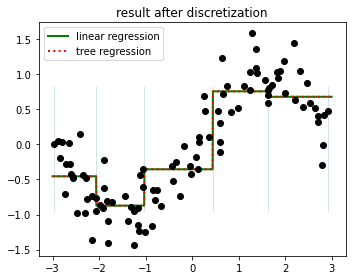

In [117]:
# 箱数减少为 5
enc = KBinsDiscretizer(n_bins=5,encode="onehot")
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)

fig, ax2 = plt.subplots(1, figsize=(5, 4))

LinearR_ = LR().fit(X_binned, y)
print(LinearR_.score(line_binned, np.sin(line)))
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)

ax2.plot(line
         ,LinearR_.predict(line_binned)
         ,linewidth=2
         ,color="green"
         ,linestyle="-"
         ,label="linear regression"
        )
ax2.plot(line
         ,TreeR_.predict(line_binned)
         ,linewidth=2
         ,color="red"
         ,linestyle=":"
         ,label="tree regression"
        )

# 绘制和箱宽一致的竖线
ax2.vlines(enc.bin_edges_[0]
            ,*plt.gca().get_ylim() # y 的上限和下限
            ,linewidth=1
            ,alpha=0.2
           )

ax2.plot(X[:, 0], y, "o", c="k")

ax2.legend(loc="best")
ax2.set_title("result after discretization")
plt.tight_layout()
plt.show()

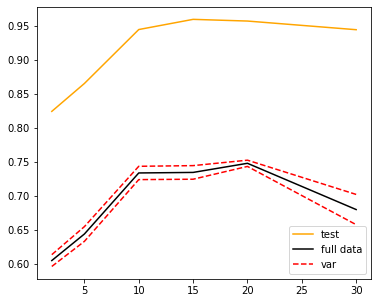

In [121]:
# 交叉验证选箱数

from sklearn.model_selection import cross_val_score

pred, score, var = [], [], []
binsrange = [2, 5, 10, 15, 20, 30]

for i in binsrange:
    # 实例化分箱类
    enc = KBinsDiscretizer(n_bins=i, encode="onehot")
    # 转换数据
    X_binned = enc.fit_transform(X)
    line_binned = enc.transform(line)
    # 建模
    LinearR_ = LR()
    cvresult = cross_val_score(LinearR_, X_binned, y, cv=5)
    score.append(cvresult.mean())
    var.append(cvresult.var())
    pred.append(LinearR_.fit(X_binned, y).score(line_binned, np.sin(line)))
    
plt.figure(figsize=(6, 5))
plt.plot(binsrange, pred, c="orange", label="test") # 测试数据
plt.plot(binsrange, score, c="k", label="full data") # 全数据上交叉验证结果均值
# 围绕在均值两边的方差
plt.plot(binsrange, score + np.array(var) * 0.5, c="red", linestyle="--", label="var") 
plt.plot(binsrange, score - np.array(var) * 0.5, c="red", linestyle="--")
plt.legend()
plt.show()

# 多项式回归

In [122]:
from sklearn.preprocessing import PolynomialFeatures

In [123]:
# 原始数据一维
X1 = np.arange(1, 4).reshape(-1, 1)
X1

array([[1],
       [2],
       [3]])

In [124]:
# 二次多项式

poly = PolynomialFeatures(degree=2)

In [125]:
X1_ = poly.fit_transform(X1)

In [126]:
X1_

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [127]:
# 三次多项式
poly = PolynomialFeatures(degree=3)

In [128]:
X1_3 = poly.fit_transform(X1)

In [129]:
X1_3

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [135]:
PolynomialFeatures(degree=3, include_bias=False).fit_transform(X1)

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.]])

In [136]:
xxx = PolynomialFeatures(degree=3).fit_transform(X1)
xxx.shape

(3, 4)

In [137]:
rnd = np.random.RandomState(42) #设置随机数种子
y = rnd.randn(3)
y

array([ 0.49671415, -0.1382643 ,  0.64768854])

In [138]:
# 产生了多少个系数
LR().fit(xxx, y).coef_

array([ 1.36002321e-15, -3.51045297e-01, -6.06987134e-01,  2.19575463e-01])

In [139]:
LR().fit(xxx, y).intercept_

1.2351711202036895

In [140]:
LR(fit_intercept=False).fit(xxx, y).coef_

array([ 1.00596411,  0.06916756, -0.83619415,  0.25777663])

In [141]:
LR(fit_intercept=False).fit(xxx, y).intercept_

0.0

In [142]:
# 二维特征的情况

X2 = np.arange(6).reshape(3, 2)
X2

array([[0, 1],
       [2, 3],
       [4, 5]])

In [144]:
PolynomialFeatures(degree=2).fit_transform(X2)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [145]:
# 只生成交互项
PolynomialFeatures(degree=2, interaction_only=True).fit_transform(X2)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

# 多项式回归处理非线性问题

In [146]:
np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3

In [147]:
X = X.reshape(-1, 1)

In [148]:
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

In [149]:
LinearR = LR().fit(X, y)

In [150]:
LinearR.score(X, y)

0.6116049215467445

In [151]:
LinearR.score(line, np.sin(line))

0.6826835831058071

In [152]:
# 5 次多项式拟合
d = 5

poly = PolynomialFeatures(degree=5)
X_ = poly.fit_transform(X)
line_ = poly.fit_transform(line)

In [153]:
LinearR_ = LR().fit(X_, y)

In [154]:
LinearR_.score(X_, y)

0.8577085541714713

In [156]:
LinearR_.score(line_, np.sin(line))

0.9881634624332679

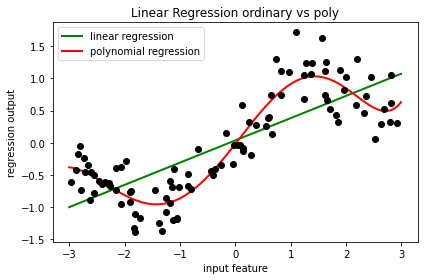

In [162]:
# 可视化

d = 6

poly = PolynomialFeatures(degree=d)
X_ = poly.fit_transform(X)
line_ = poly.fit_transform(line)
LinearR_ = LR().fit(X_, y)

fig, ax1 = plt.subplots(1)

ax1.plot(line, LinearR.predict(line), linewidth=2, color="green", label="linear regression")
ax1.plot(line, LinearR_.predict(line_), linewidth=2, color="red", label="polynomial regression")

ax1.plot(X[:, 0], y, "o", c="k")

ax1.legend(loc="best")
ax1.set_ylabel("regression output")
ax1.set_xlabel("input feature")
ax1.set_title("Linear Regression ordinary vs poly")

plt.tight_layout()
plt.show()

In [163]:
# 多项式回归的可解释性

X = np.arange(9).reshape(3, 3)
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [164]:
poly = PolynomialFeatures(degree=5).fit(X)

In [165]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [181]:
X = pd.DataFrame(housevalue.data)
y = housevalue.target

In [182]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [183]:
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
             ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]
X.columns

Index(['住户收入中位数', '房屋使用年代中位数', '平均房间数目', '平均卧室数目', '街区人口', '平均入住率', '街区的纬度',
       '街区的经度'],
      dtype='object')

In [184]:
X.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [185]:
poly = PolynomialFeatures(degree=2).fit(X,y)

In [186]:
poly.get_feature_names(X.columns)

['1',
 '住户收入中位数',
 '房屋使用年代中位数',
 '平均房间数目',
 '平均卧室数目',
 '街区人口',
 '平均入住率',
 '街区的纬度',
 '街区的经度',
 '住户收入中位数^2',
 '住户收入中位数 房屋使用年代中位数',
 '住户收入中位数 平均房间数目',
 '住户收入中位数 平均卧室数目',
 '住户收入中位数 街区人口',
 '住户收入中位数 平均入住率',
 '住户收入中位数 街区的纬度',
 '住户收入中位数 街区的经度',
 '房屋使用年代中位数^2',
 '房屋使用年代中位数 平均房间数目',
 '房屋使用年代中位数 平均卧室数目',
 '房屋使用年代中位数 街区人口',
 '房屋使用年代中位数 平均入住率',
 '房屋使用年代中位数 街区的纬度',
 '房屋使用年代中位数 街区的经度',
 '平均房间数目^2',
 '平均房间数目 平均卧室数目',
 '平均房间数目 街区人口',
 '平均房间数目 平均入住率',
 '平均房间数目 街区的纬度',
 '平均房间数目 街区的经度',
 '平均卧室数目^2',
 '平均卧室数目 街区人口',
 '平均卧室数目 平均入住率',
 '平均卧室数目 街区的纬度',
 '平均卧室数目 街区的经度',
 '街区人口^2',
 '街区人口 平均入住率',
 '街区人口 街区的纬度',
 '街区人口 街区的经度',
 '平均入住率^2',
 '平均入住率 街区的纬度',
 '平均入住率 街区的经度',
 '街区的纬度^2',
 '街区的纬度 街区的经度',
 '街区的经度^2']

In [187]:
X_ = poly.transform(X)

In [188]:
reg = LR().fit(X_, y)

coef = reg.coef_

[*zip(poly.get_feature_names(X.columns), reg.coef_)]

[('1', 5.9195538644919796e-08),
 ('住户收入中位数', -11.243025714497596),
 ('房屋使用年代中位数', -0.8488985521763941),
 ('平均房间数目', 6.4410594078331895),
 ('平均卧室数目', -31.591331024586665),
 ('街区人口', 0.00040609072082741204),
 ('平均入住率', 1.0038623269919846),
 ('街区的纬度', 8.70568191718724),
 ('街区的经度', 5.880632760599423),
 ('住户收入中位数^2', -0.031308126361799526),
 ('住户收入中位数 房屋使用年代中位数', 0.0018599481873361814),
 ('住户收入中位数 平均房间数目', 0.0433020475128291),
 ('住户收入中位数 平均卧室数目', -0.18614228960857865),
 ('住户收入中位数 街区人口', 5.728312818152744e-05),
 ('住户收入中位数 平均入住率', -0.0025901946738786045),
 ('住户收入中位数 街区的纬度', -0.15250571590733897),
 ('住户收入中位数 街区的经度', -0.14424294455015796),
 ('房屋使用年代中位数^2', 0.0002117253023116225),
 ('房屋使用年代中位数 平均房间数目', -0.0012621898666516458),
 ('房屋使用年代中位数 平均卧室数目', 0.010611504443537928),
 ('房屋使用年代中位数 街区人口', 2.818851771461938e-06),
 ('房屋使用年代中位数 平均入住率', -0.0018171694526602094),
 ('房屋使用年代中位数 街区的纬度', -0.010069037289191623),
 ('房屋使用年代中位数 街区的经度', -0.009999501778545252),
 ('平均房间数目^2', 0.007269477300922367),
 ('平均房间数目 平

In [189]:
coeff = pd.DataFrame([poly.get_feature_names(X.columns), reg.coef_]).T
coeff.columns = ["feature", "coef"]

coeff.sort_values(by="coef")

,feature,coef
4,平均卧室数目,-31.5913
1,住户收入中位数,-11.243
2,房屋使用年代中位数,-0.848899
33,平均卧室数目 街区的纬度,-0.437043
34,平均卧室数目 街区的经度,-0.404151
12,住户收入中位数 平均卧室数目,-0.186142
15,住户收入中位数 街区的纬度,-0.152506
16,住户收入中位数 街区的经度,-0.144243
32,平均卧室数目 平均入住率,-0.0871911
25,平均房间数目 平均卧室数目,-0.0689064


In [190]:
# 用多项式回归对模型表现的提升

poly = PolynomialFeatures(degree=4).fit(X, y)
X_ = poly.transform(X)

In [191]:
reg = LR().fit(X, y)
reg.score(X, y)

0.606232685199805

In [193]:
reg_ = LR().fit(X_, y)
reg_.score(X_, y)

0.7452068736655493

In [196]:
coeff = pd.DataFrame([poly.get_feature_names(X.columns), reg_.coef_]).T
coeff.columns = ["feature", "coef"]

coeff.sort_values(by="coef")

,feature,coef
491,街区的纬度^3 街区的经度,-0.0107648
490,街区的纬度^4,-0.00870925
492,街区的纬度^2 街区的经度^2,-0.00498437
377,平均房间数目^2 平均卧室数目 平均入住率,-0.00376389
421,平均房间数目 街区的纬度^3,-0.00257284
...,...,...
38,街区人口 街区的经度,0.00208894
183,住户收入中位数^2 平均房间数目 平均入住率,0.0021025
319,房屋使用年代中位数 平均房间数目 平均卧室数目^2,0.00248276
168,住户收入中位数^3 平均卧室数目,0.0028625


In [199]:
# 使用其它模型

from sklearn.ensemble import RandomForestRegressor as RFR

rfr = RFR(n_estimators=100).fit(X, y)
rfr.score(X, y)

0.9740733898217372